In [1]:
import cv2
import json
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# train_dir = 'image/'

In [4]:
# import shutil

# for name in train_json:
#     with open(name, 'r',encoding='utf-8') as j:
#         data = json.load(j)
#         f_name = data['image_file_name']
#         c_name = data['value_6']
#         fr = '/content/drive/Othercomputers/내 컴퓨터/img/'+f_name
#         to = '/content/drive/Othercomputers/내 컴퓨터/img/'+ c_name + '/' + f_name
#         shutil.move(fr,to)

In [5]:
# val_json = glob.glob('val_label/*.json')
# len(val_json)

In [6]:
# import shutil

# for name in val_json:
#     with open(name, 'r',encoding='utf-8') as j:
#         data = json.load(j)
#         f_name = data['image_file_name']
#         c_name = data['value_6']
#         fr = 'val_image/'+f_name
#         to = 'val_image/'+ c_name + '/' + f_name
#         shutil.move(fr,to)

In [7]:
train_dir = '/content/drive/Othercomputers/내 컴퓨터/img/'
valid_dir = 'val_image'

In [8]:
train_datagen = ImageDataGenerator(
                                  # rotation_range=20,
                                 #   rescale=1./255,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  brightness_range=(0.0, 1.0),
                                  #  fill_mode='wrap',
                                   validation_split=0.2,
                                  
                                   horizontal_flip=True)

# test_datagen = ImageDataGenerator(rotation_range=20,
#                                  #   rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    brightness_range=(0.0, 1.0),
#                                    fill_mode='wrap',
#                                    validation_split=0.2,
#                                    subset='validation',
#                                    horizontal_flip=True)

# valid_datagen = ImageDataGenerator(rotation_range=20,
#                                  #   rescale=1./255,                                   
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    brightness_range=(0.0, 1.0),
#                                    fill_mode='wrap',
#                                 #    validation_split=0.2,
#                                    horizontal_flip=True)

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32, subset='training')
test_generator = train_datagen.flow_from_directory(train_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32, subset='validation')
# valid_generator = valid_datagen.flow_from_directory(valid_dir, class_mode='sparse', seed=123, target_size=(64,64), batch_size=32)

Found 14812 images belonging to 4 classes.
Found 3701 images belonging to 4 classes.


In [10]:
len(train_generator)

463

In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.applications.efficientnet.EfficientNetB4(
        include_top=False,
        weights='imagenet',
        input_shape=(64,64,3),
        pooling='avg',
        classes = 4
    ),
    tf.keras.layers.Dense(4, activation='softmax')
])

71686520/71686520 [==============================] - 3s 0us/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 4)                 7172      
                                                                 
Total params: 17,680,995
Trainable params: 17,555,788
Non-trainable params: 125,207
_________________________________________________________________


In [14]:
base_input = model.input
base_output = model.layers[-2].output
# newModel = tf.keras.models.Model(inputs= base_input, outputs = base_output)
newModel = tf.keras.models.Sequential()
# newModel.add(tf.keras.models.Model(inputs= base_input, outputs = base_output))
newModel.add(model)
# newModel.add(tf.keras.layers.GlobalAveragePooling2D())
newModel.add(tf.keras.layers.Dropout(0.2))
newModel.add(tf.keras.layers.Dense(4, activation='softmax'))
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4)                 17680995  
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
Total params: 17,681,015
Trainable params: 17,555,808
Non-trainable params: 125,207
_________________________________________________________________


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                     validation_data=test_generator,
                     epochs=20,
                     steps_per_epoch=len(train_generator),
                     validation_steps=len(test_generator)
                     )

Epoch 1/20
463/463 [==============================] - 94s 160ms/step - loss: 0.7340 - accuracy: 0.7154 - val_loss: 0.6871 - val_accuracy: 0.7195
Epoch 2/20
463/463 [==============================] - 70s 151ms/step - loss: 0.6208 - accuracy: 0.7531 - val_loss: 0.6080 - val_accuracy: 0.7630
Epoch 3/20
463/463 [==============================] - 68s 148ms/step - loss: 0.5784 - accuracy: 0.7661 - val_loss: 0.6124 - val_accuracy: 0.7503
Epoch 4/20
463/463 [==============================] - 68s 148ms/step - loss: 0.5501 - accuracy: 0.7825 - val_loss: 0.6356 - val_accuracy: 0.7417
Epoch 5/20
463/463 [==============================] - 70s 152ms/step - loss: 0.5161 - accuracy: 0.7951 - val_loss: 0.5859 - val_accuracy: 0.7549
Epoch 6/20
463/463 [==============================] - 68s 148ms/step - loss: 0.4899 - accuracy: 0.8041 - val_loss: 0.6392 - val_accuracy: 0.7422
Epoch 7/20
463/463 [==============================] - 69s 148ms/step - loss: 0.4642 - accuracy: 0.8176 - val_loss: 0.6424 - val_ac

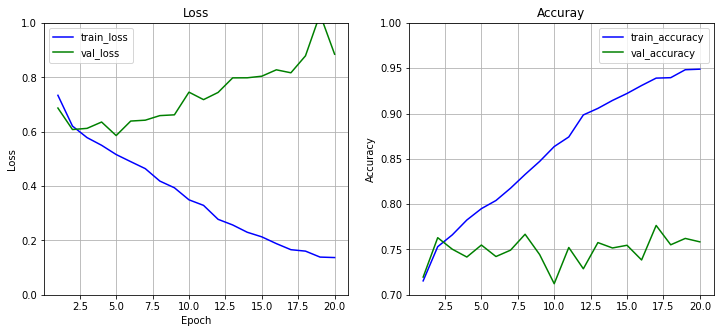

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [20]:
model.save('/content/drive/MyDrive/skku_ai/ENB3.h5')